In [26]:
from IPython.display import Image

import pprint
import json

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

tf.keras.backend.clear_session()

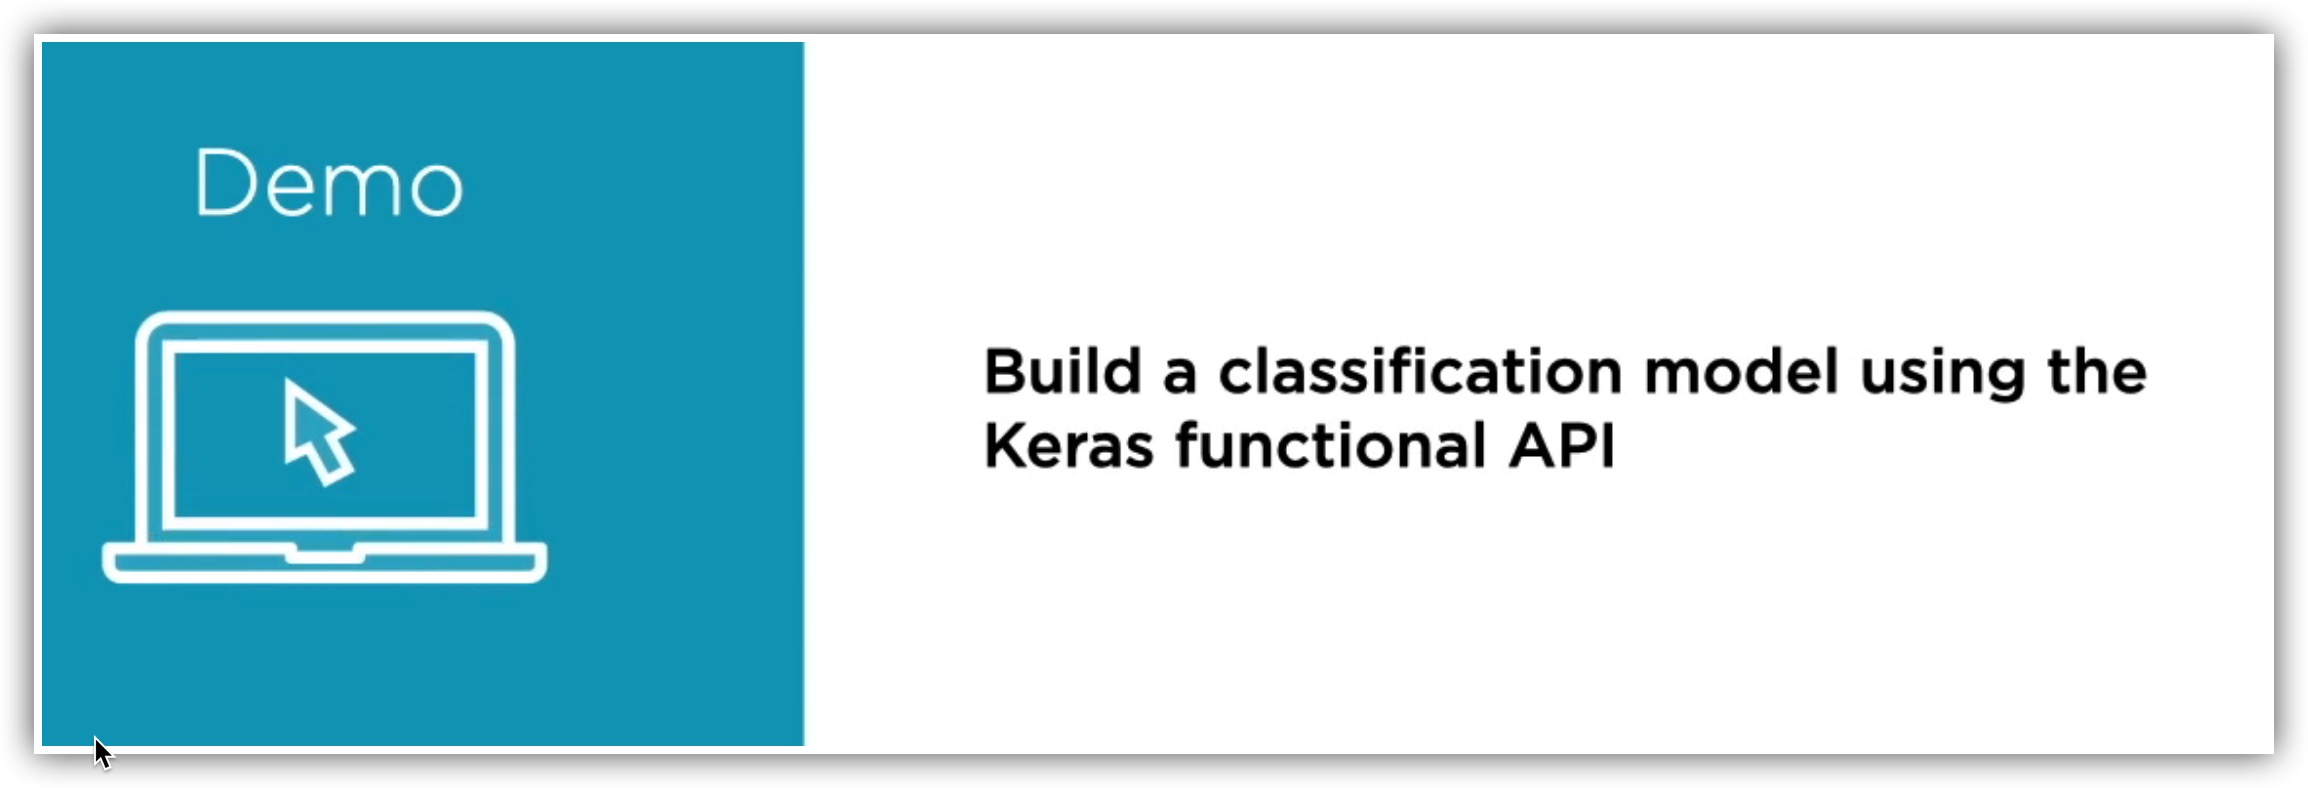

In [8]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_22-29-38.jpg')

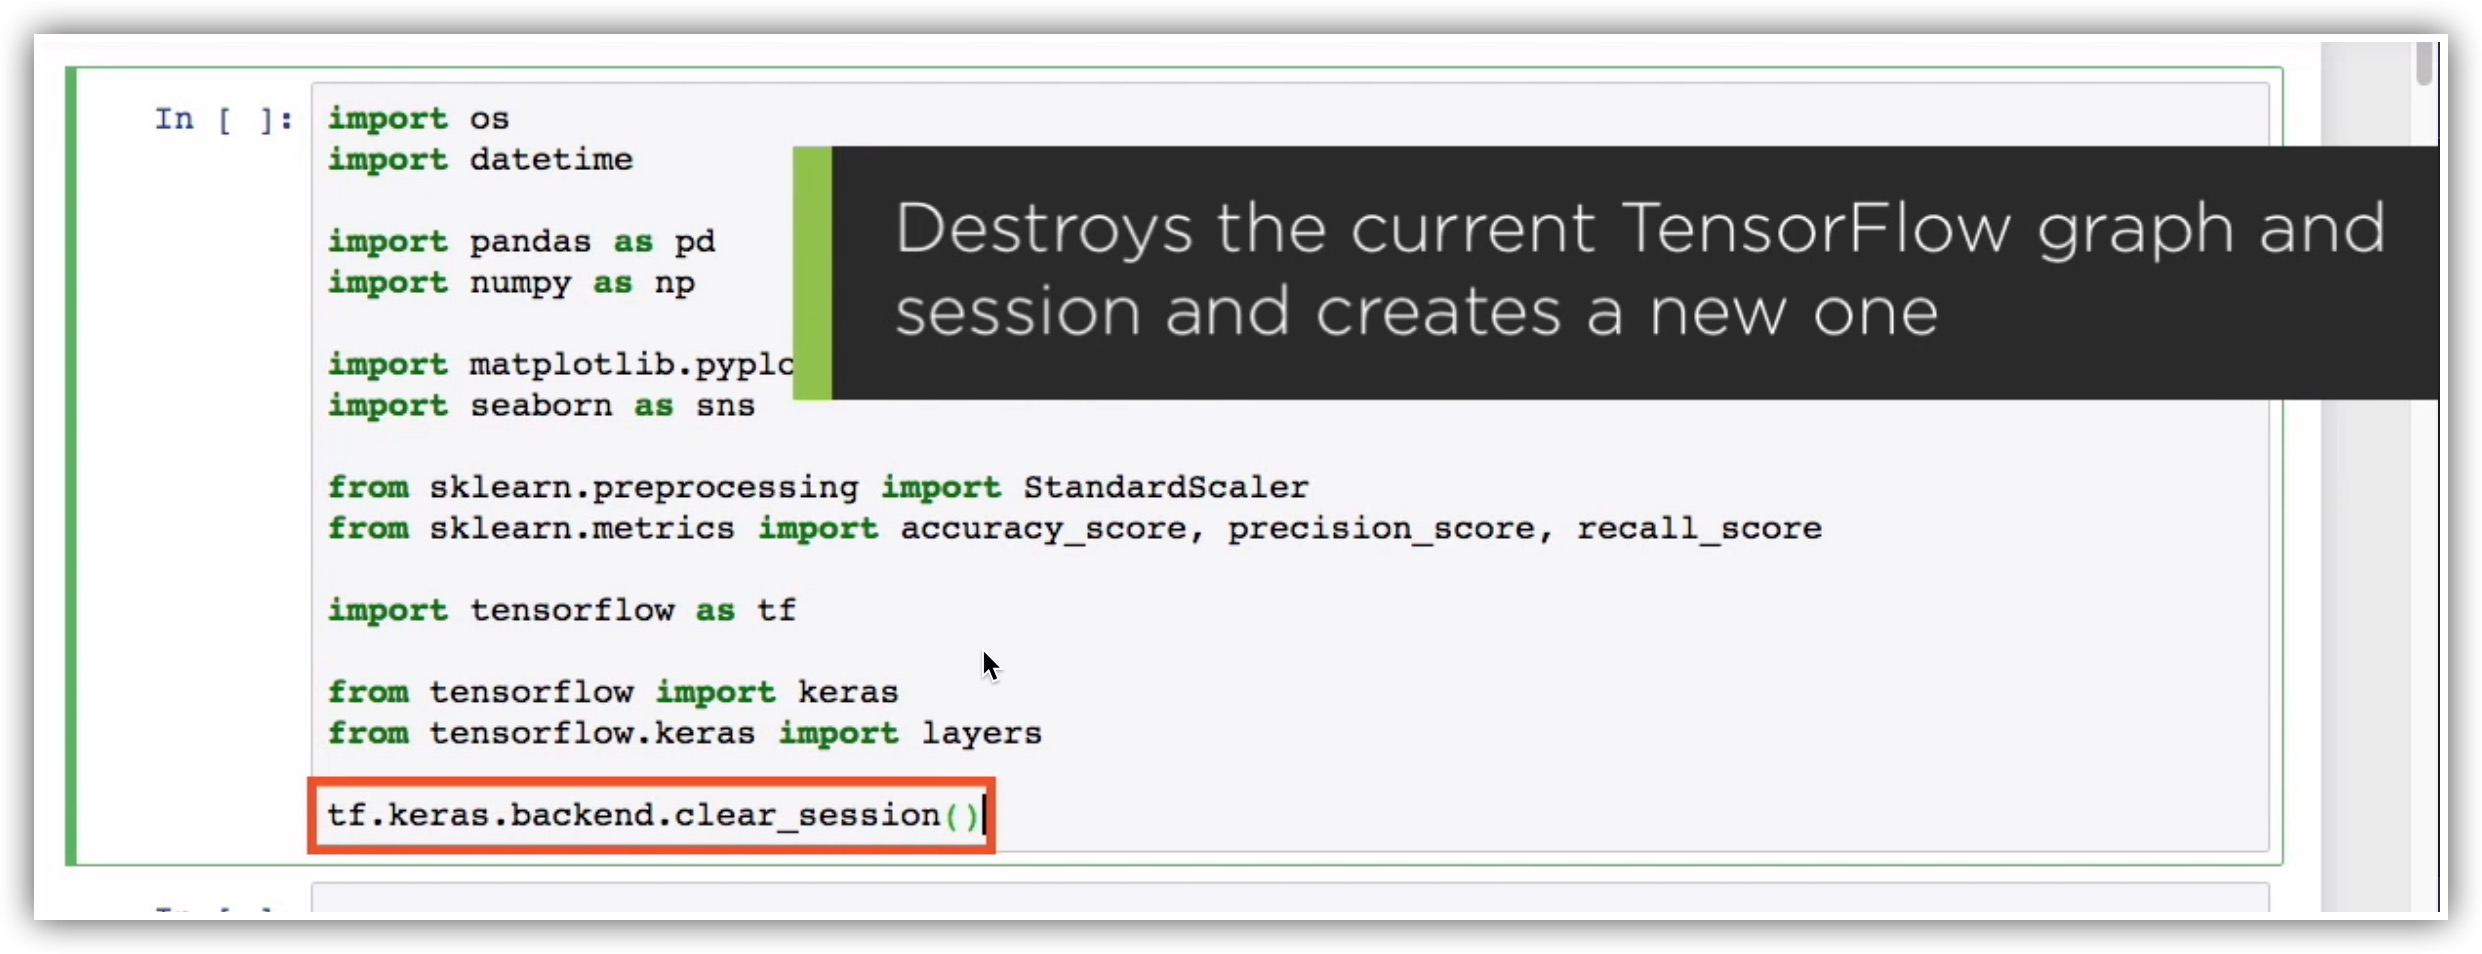

In [9]:
'''
In case you're building multiple models using the same Python kernel, you might want to use clear_session 
to ensure that you've gotten rid of your current session and you're starting off fresh. 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_22-33-19.jpg')

In [10]:
#https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset


'''
Let's move on and let's go ahead and read in the CSV file that contains our data.
can see that the data that it contains includes attributes of the spine as measured in a medical examination. 

In our classification model here, we'll use these spine attributes to determine whether the spine displays any abnormality. 

'''
spine_data = pd.read_csv('datasets/Dataset_spine.csv', 
                         skiprows=1,
                         names=['pelvic_incidence',
                                'pelvic tilt',
                                'lumbar_lordosis_angle',
                                'sacral_slope',
                                'pelvic_radius',
                                'degree_spondylolisthesis',
                                'pelvic_slope',
                                'direct_tilt',
                                'thoracic_slope',
                                'cervical_tilt',
                                'sacrum_angle',
                                'scoliosis_slope',
                                'class_att'])

spine_data = spine_data.sample(frac=1).reset_index(drop=True)

In [11]:
from tabulate import tabulate
def DisplayMatrix(M):
    print(tabulate(M, headers='keys', tablefmt='double_grid'))

In [15]:
'''
T format so that I can view it all on one screen. 
Here are all of the features that we'll use in our model. 
And finally, class_att is the class that we'll try and have our model predict.
Spines are classified as either abnormal or normal. 
'''
DisplayMatrix(spine_data.head().T)

╔══════════════════════════╦═════════════╦═════════════╦═════════════╦═════════════╦═════════════╗
║                          ║ 0           ║ 1           ║ 2           ║ 3           ║ 4           ║
╠══════════════════════════╬═════════════╬═════════════╬═════════════╬═════════════╬═════════════╣
║ pelvic_incidence         ║ 70.67689818 ║ 72.05403412 ║ 30.14993632 ║ 63.79242525 ║ 48.25991962 ║
╠══════════════════════════╬═════════════╬═════════════╬═════════════╬═════════════╬═════════════╣
║ pelvic tilt              ║ 21.70440224 ║ 24.70073725 ║ 11.91744524 ║ 21.34532339 ║ 16.41746236 ║
╠══════════════════════════╬═════════════╬═════════════╬═════════════╬═════════════╬═════════════╣
║ lumbar_lordosis_angle    ║ 59.18116082 ║ 79.87401586 ║ 34.0        ║ 65.99999999 ║ 36.32913708 ║
╠══════════════════════════╬═════════════╬═════════════╬═════════════╬═════════════╬═════════════╣
║ sacral_slope             ║ 48.97249594 ║ 47.35329687 ║ 18.23249108 ║ 42.44710185 ║ 31.84245726 ║
╠═════════

In [17]:
'''
This is a fairly small dataset, and you really wouldn't use a neural network to train on this data. 
It has just 310 rows, but it serves very well for the purposes of our demo. 

 
'''
spine_data.shape

(310, 13)

In [18]:
'''
The columns of this data frame gives us the features that we have to work with, as well as the target, 
what we're going to try and predict.
'''
spine_data.columns

Index(['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'class_att'],
      dtype='object')

In [19]:
spine_data['class_att'].value_counts()

Abnormal    210
Normal      100
Name: class_att, dtype: int64

In [20]:
'''
Let's take a look at the target here, which is the class_att column. 
You can see that there are two possible classifications of a spine, Abnormal or Normal, 
so this is a binary classification model. 
'''
spine_data['class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [25]:
'''
All of the features that we'll use to train our classification model are numeric, continuous features.

The describe function shows us that the means and standard deviations of each numeric feature is very different, 
which means it will help to standardize the data to build a more robust model.
'''

DisplayMatrix(spine_data.describe().transpose())

╔══════════════════════════╦═════════╦════════════╦═══════════╦══════════════╦════════════╦════════════╦════════════╦════════════╗
║                          ║   count ║       mean ║       std ║          min ║        25% ║        50% ║        75% ║        max ║
╠══════════════════════════╬═════════╬════════════╬═══════════╬══════════════╬════════════╬════════════╬════════════╬════════════╣
║ pelvic_incidence         ║     310 ║  60.4967   ║ 17.2365   ║  26.1479     ║  46.4303   ║  58.691    ║  72.8777   ║ 129.834    ║
╠══════════════════════════╬═════════╬════════════╬═══════════╬══════════════╬════════════╬════════════╬════════════╬════════════╣
║ pelvic tilt              ║     310 ║  17.5428   ║ 10.0083   ║  -6.55495    ║  10.6671   ║  16.3577   ║  22.1204   ║  49.4319   ║
╠══════════════════════════╬═════════╬════════════╬═══════════╬══════════════╬════════════╬════════════╬════════════╬════════════╣
║ lumbar_lordosis_angle    ║     310 ║  51.9309   ║ 18.5541   ║  14          ║  37 

<Axes: title={'center': 'Count of Normal and Abnormal Spines'}, xlabel='class_att', ylabel='count'>

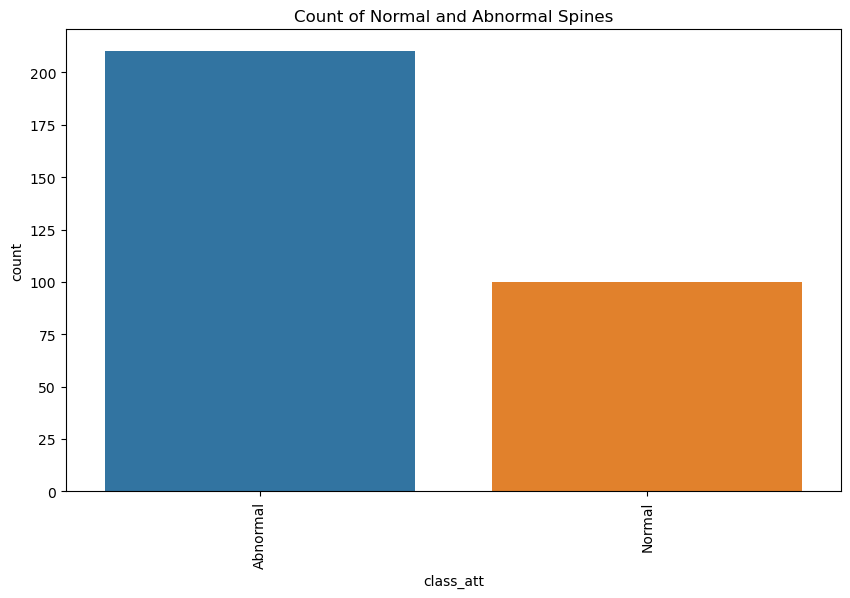

In [28]:
'''
Let's briefly explore the data that we have before we move on to processing our features. 

I'm going to use a Seaborn count plot to see how the data is split across normal spines and abnormal spines. 

You can see that most of the records have some kind of spine abnormality. 
'''
plt.figure(figsize=(10, 6))
plt.title('Count of Normal and Abnormal Spines')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.countplot(x='class_att', data=spine_data)

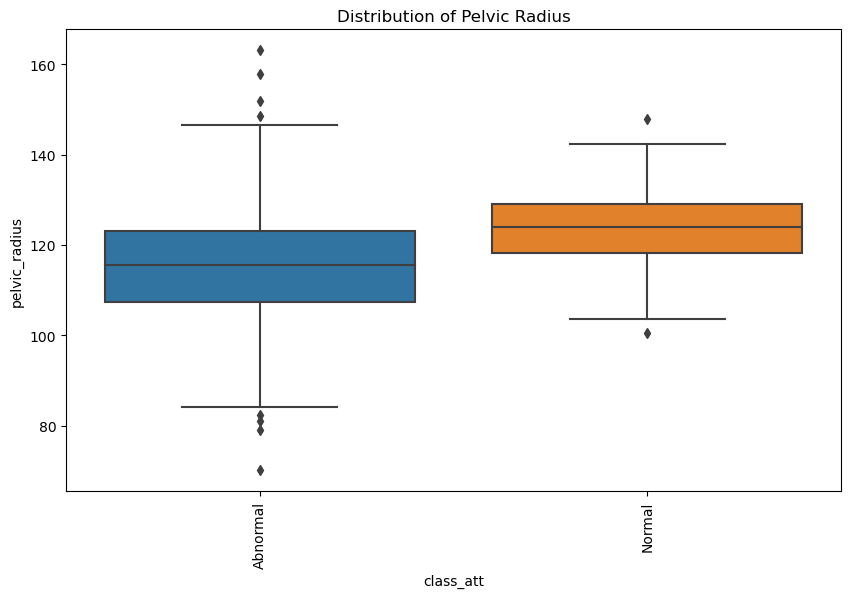

In [29]:
'''
You can also view the distribution of the values for different features based on whether 
the spine is abnormal or normal using a box plot representation. 

It appears from the plot of the pelvic radius here that abnormal spines tend to have a larger reach, 
that is a wider range for pelvic radius, and the pelvic radius overall seems to be smaller. 
'''

plt.figure(figsize=(10, 6))
plt.title('Distribution of Pelvic Radius')
plt.xlabel('Class')
plt.ylabel('Pelvic Radius')
plt.xticks(rotation=90)
sns.boxplot(x='class_att', y='pelvic_radius', data=spine_data)
plt.show()

In [31]:
'''
 All of the features that we'll use to train our model are continuous numeric, but the class attribute 
 is a categorical value. 
 
 So let's encode this using label encoding. We'll use 0 to represent an abnormal 
 spine and 1 to represent a normal spine.
'''

class_att = {'Abnormal': 0, 'Normal': 1}
spine_data['class_att'].replace(class_att, inplace=True)
DisplayMatrix(spine_data[['class_att']].sample(10))

╔═════╦═════════════╗
║     ║   class_att ║
╠═════╬═════════════╣
║ 284 ║           0 ║
╠═════╬═════════════╣
║ 157 ║           0 ║
╠═════╬═════════════╣
║ 108 ║           1 ║
╠═════╬═════════════╣
║ 173 ║           0 ║
╠═════╬═════════════╣
║ 175 ║           0 ║
╠═════╬═════════════╣
║ 214 ║           1 ║
╠═════╬═════════════╣
║  18 ║           0 ║
╠═════╬═════════════╣
║ 120 ║           0 ║
╠═════╬═════════════╣
║  25 ║           0 ║
╠═════╬═════════════╣
║ 123 ║           0 ║
╚═════╩═════════════╝


In [32]:
'''
Extract all of the features or predictors to train our model into the features data frame and 
the target will store in the target data frame. 
'''

features=spine_data.drop('class_att',axis=1)
target=spine_data[['class_att']]

In [34]:
'''
The only processing that we'll do to our features is to standardize them, using the StandardScaler from scikit‑learn.

Invoking fit_transform on the scikit‑learn estimator will standardize our data so that all of 
our numeric features will now have a mean very close to 0, they are now centered around 0, 
and will have a standard deviation close to 1.
'''
standardScaler=StandardScaler()
scaled_features=pd.DataFrame(standardScaler.fit_transform(features),
                             columns=features.columns,
                             index=features.index)
DisplayMatrix(scaled_features.describe().transpose())

╔══════════════════════════╦═════════╦══════════════╦═════════╦═══════════╦═══════════╦════════════╦══════════╦══════════╗
║                          ║   count ║         mean ║     std ║       min ║       25% ║        50% ║      75% ║      max ║
╠══════════════════════════╬═════════╬══════════════╬═════════╬═══════════╬═══════════╬════════════╬══════════╬══════════╣
║ pelvic_incidence         ║     310 ║ -8.20132e-17 ║ 1.00162 ║ -1.99601  ║ -0.817398 ║ -0.104925  ║ 0.719464 ║  4.02921 ║
╠══════════════════════════╬═════════╬══════════════╬═════════╬═══════════╬═══════════╬════════════╬══════════╬══════════╣
║ pelvic tilt              ║     310 ║  2.26342e-16 ║ 1.00162 ║ -2.41166  ║ -0.688114 ║ -0.118606  ║ 0.458116 ║  3.1914  ║
╠══════════════════════════╬═════════╬══════════════╬═════════╬═══════════╬═══════════╬════════════╬══════════╬══════════╣
║ lumbar_lordosis_angle    ║     310 ║  1.96259e-16 ║ 1.00162 ║ -2.04765  ║ -0.806027 ║ -0.127862  ║ 0.597549 ║  3.98461 ║
╠═══════════════

In [35]:

'''
We now have a scaled features data frame holding the predictors for our model. The shape is 310, 12. 
'''
scaled_features.shape

(310, 12)

In [36]:
'''
Let's split this data into training data and test data. We'll use 263 records to train our model, 
the remaining to test our model. 
'''

X_train,X_test,y_train,y_test=train_test_split(scaled_features,
                                               target,
                                               test_size=0.15,
                                               random_state=10)

In [38]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((263, 12), (263, 1), (47, 12), (47, 1))

In [39]:
'''
When we train our model using Keras and TensorFlow, I want to validate the model during the training process. 

I'm going to further split the training data, carve out a portion of this data to use for validation, 
15% of the training data we'll use to validate our model during the training process. 
'''
X_train,X_val,y_train,y_val=train_test_split(X_train,
                                             y_train,
                                            test_size=0.15,
                                            random_state=10)

In [40]:
'''
Finally, here is how our data is split. Training data, validation data during the process of training, 
and test data that we'll use to finally evaluate our model. 
'''
X_train.shape,X_val.shape,X_test.shape

((223, 12), (40, 12), (47, 12))

In [41]:
y_train.shape,y_val.shape,y_test.shape

((223, 1), (40, 1), (47, 1))